# SVM
* solves classification and regression problems

### Classification problem

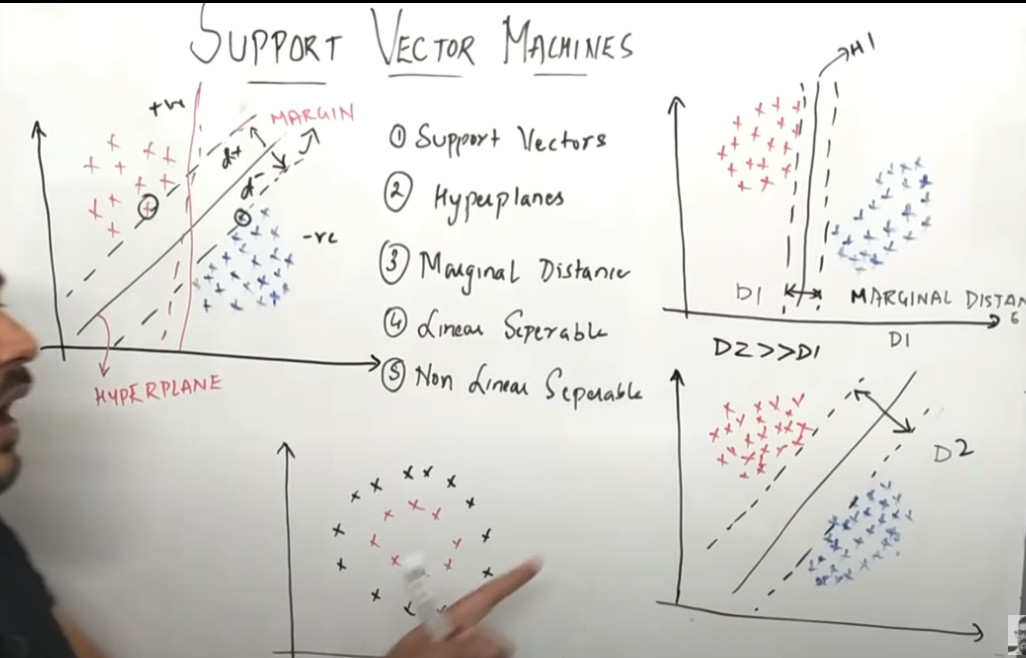

* Hyper planes - can be a line or a plane, works better is the data is linearly separable. For not linearly separable data we can use some of the tricks (higher order) available in SVM ,these tricks are called kernals and are used to use higher dimension toseparate the data.
* Marginal Distance - we want the hyperplane that generates the bigger marginal distance , here D2>>D1 which means D2 will work better generalizing. this distance is calculated between the parallel lines that touches the nearest data on each side of the hyperplane. these data is called support vecotrs
* Support Vectors are the data nearest at both sides of the hyperplane, these data or support vectors are used to create the margin distance  

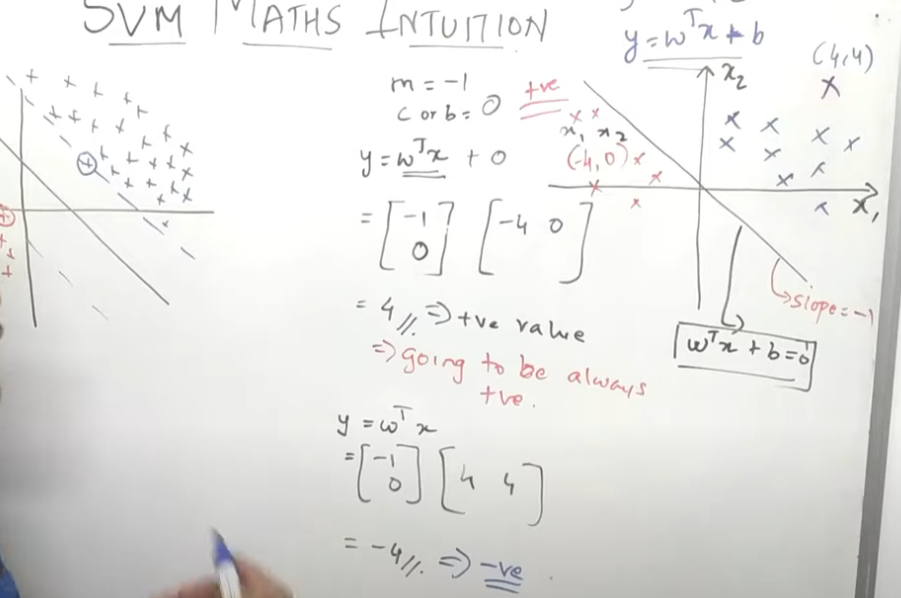

* to the left of the hyperplane the values will be always positive
* to the right of the hyper plane the values will be alwasy negative

### This is how we calcualte the positive and negative planes through the support vectors and parallel to the hyperplane. these positive and negative planes create the margin distance

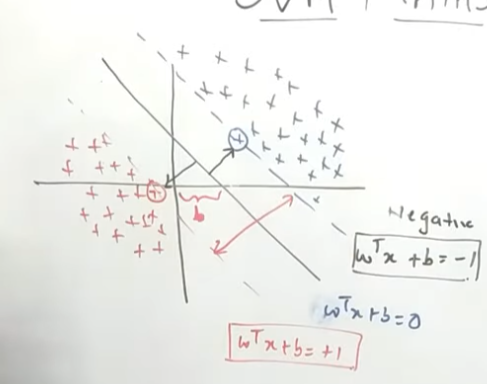

### This is how we create the equations for the positive/negative planes using the nearest support vectors, at the end we need to maximize the margin distance which is the same as maximizing the right side of the equation

* we need to find W and B in such a way that maximizes the equation 2/||W|| but following the conditions set :  Yi+WTXi+Bi >= 1  otherwise the point will be a missclassification
  
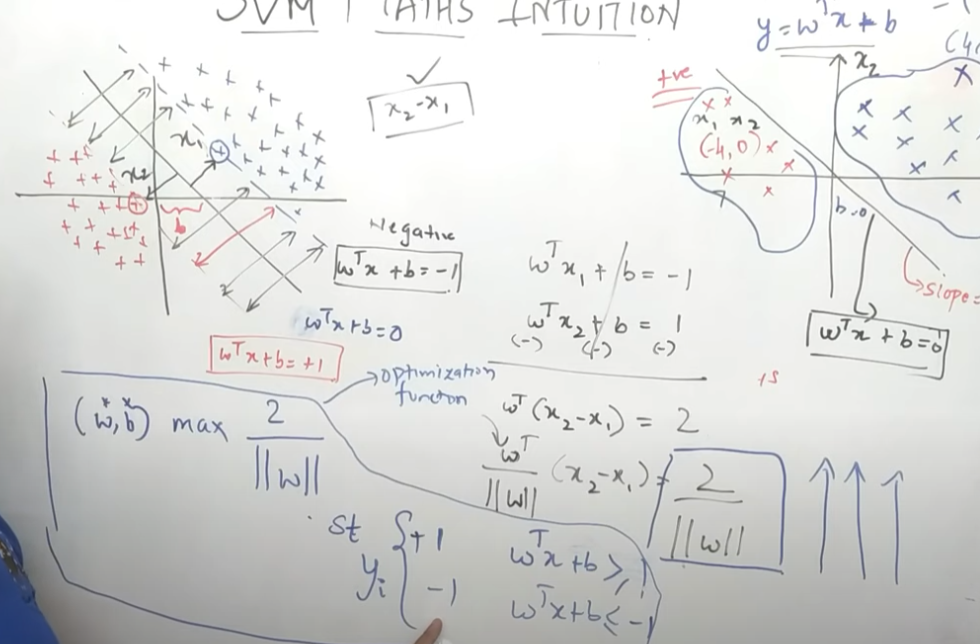

### To better optimize my solution i will rewrite min instead of max and add two more parameters Ci - how many error we will allow and Si - value of the error.
* Ci - is a sort of regularization and needs to be hyperparametrized

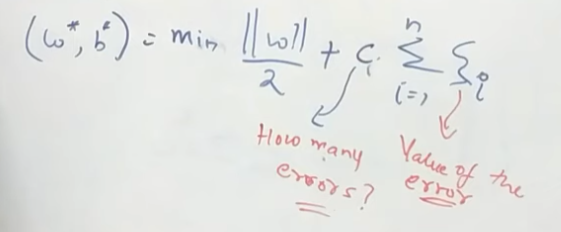

# SVM Kernels - transformation from lower dimensions to higher dimensions

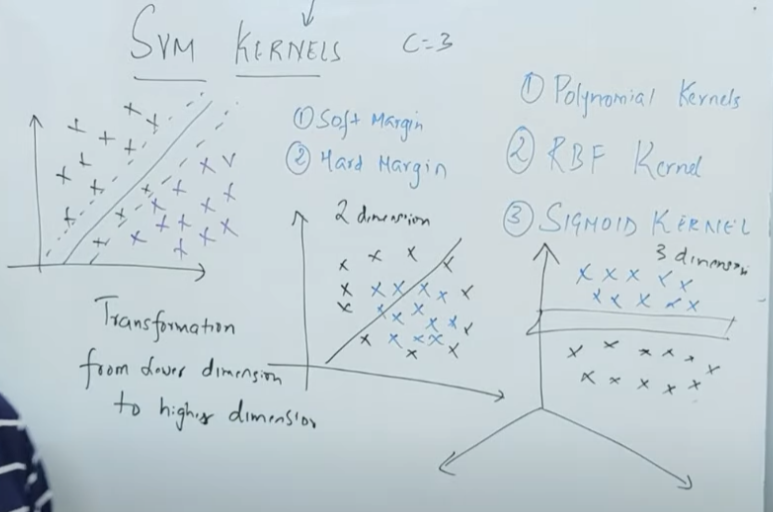

Example of trasnforming a 1D dataset into a 2D domain by using a mathematical transformation y=f(x) where x = x^2

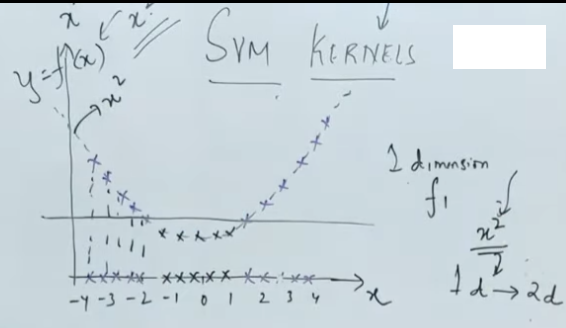

Example of polynomial Kernel operation, where d - dimensionality

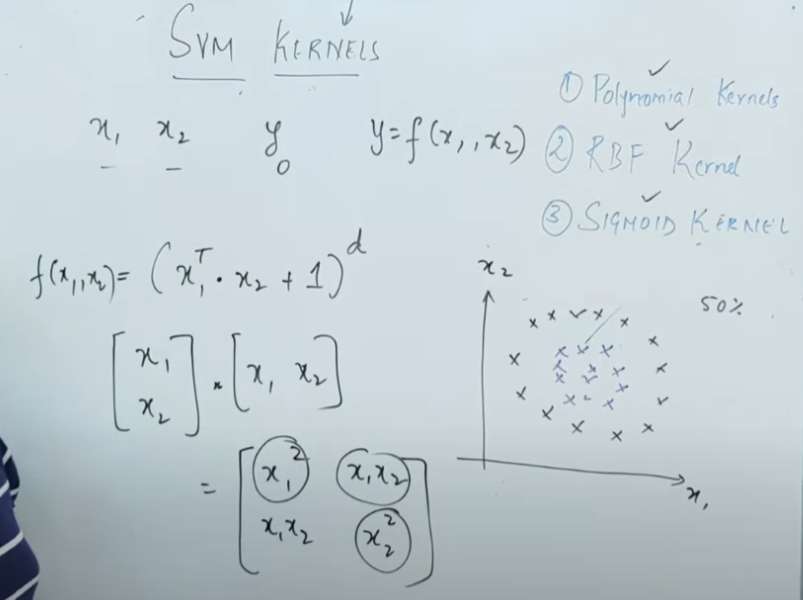

so it went from just x1,x2 to a x1^2, x2^ and x1x2 higher dimensional dataset, where the data can be easier separable

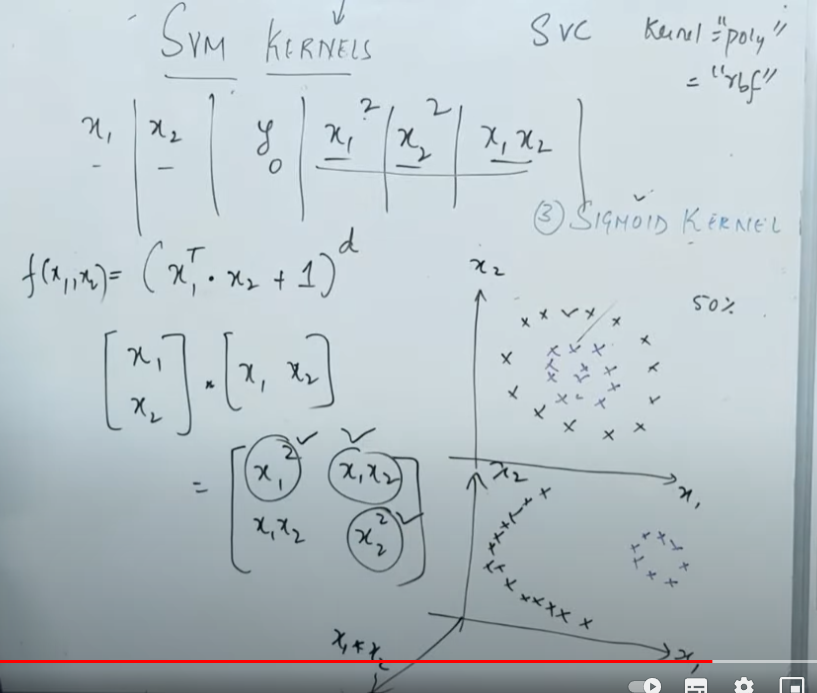

* Hyperplane tunning is used to find what kernel to use poly,rbf, sigmoid

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
print(x)
print(y)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

In [4]:
y = np.hstack([y,-y])  #Stack arrays in sequence horizontally (column wise).
x = np.hstack([x,-x])  #Stack arrays in sequence horizontally (column wise).
print(x)
print(y)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

In [9]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])  #Stack arrays in sequence horizontally (column wise).
x1 = np.hstack([x1,-x1])  #Stack arrays in sequence horizontally (column wise).

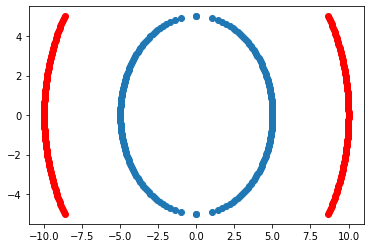

In [10]:
plt.scatter(y,x,color="r")
plt.scatter(y1,x1)

In [14]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1',"X2"])    #Stack arrays in sequence vertically (row wise).
df1['Y']=0
df1

X1       X2  Y
0    8.660254 -5.00000  0
1    8.717792 -4.89899  0
2    8.773790 -4.79798  0
3    8.828277 -4.69697  0
4    8.881281 -4.59596  0
..        ...      ... ..
195 -8.881281 -4.59596  0
196 -8.828277 -4.69697  0
197 -8.773790 -4.79798  0
198 -8.717792 -4.89899  0
199 -8.660254 -5.00000  0

[200 rows x 3 columns]

In [18]:
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1',"X2"])    #Stack arrays in sequence vertically (row wise).
df2['Y']=1
df2

X1       X2  Y
0    0.000000 -5.00000  1
1    0.999949 -4.89899  1
2    1.406908 -4.79798  1
3    1.714198 -4.69697  1
4    1.969049 -4.59596  1
..        ...      ... ..
195 -1.969049 -4.59596  1
196 -1.714198 -4.69697  1
197 -1.406908 -4.79798  1
198 -0.999949 -4.89899  1
199 -0.000000 -5.00000  1

[200 rows x 3 columns]

In [19]:
df = df1.append(df2)    # data appended at the end
df

X1       X2  Y
0    8.660254 -5.00000  0
1    8.717792 -4.89899  0
2    8.773790 -4.79798  0
3    8.828277 -4.69697  0
4    8.881281 -4.59596  0
..        ...      ... ..
195 -1.969049 -4.59596  1
196 -1.714198 -4.69697  1
197 -1.406908 -4.79798  1
198 -0.999949 -4.89899  1
199 -0.000000 -5.00000  1

[400 rows x 3 columns]

In [21]:
# train and test data split
X = df.iloc[:,:2]
y = df.Y


In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(400, 2) (400,)
(300, 2) (300,) (100, 2) (100,)


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC( kernel = "linear")
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)     # showing that a linear separation does not provide a good outcome

0.45

### Polynomial Kernel
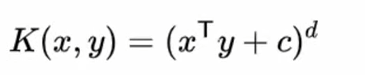

In [29]:
# find components for the polynomial kernel : X1,X2, X1^2, X2^2, X1X2
df["X1_square"] = df["X1"]**2
df["X2_square"] = df["X2"]**2
df["X1X2"] = df["X1"]*df["X2"]
df

X1       X2  Y  X1_square  X2_square       X1X2
0    8.660254 -5.00000  0  75.000000  25.000000 -43.301270
1    8.717792 -4.89899  0  75.999898  24.000102 -42.708375
2    8.773790 -4.79798  0  76.979390  23.020610 -42.096467
3    8.828277 -4.69697  0  77.938476  22.061524 -41.466150
4    8.881281 -4.59596  0  78.877155  21.122845 -40.818009
..        ...      ... ..        ...        ...        ...
195 -1.969049 -4.59596  1   3.877155  21.122845   9.049671
196 -1.714198 -4.69697  1   2.938476  22.061524   8.051537
197 -1.406908 -4.79798  1   1.979390  23.020610   6.750316
198 -0.999949 -4.89899  1   0.999898  24.000102   4.898740
199 -0.000000 -5.00000  1   0.000000  25.000000   0.000000

[400 rows x 6 columns]

In [31]:
y = df.Y
X = df.drop("Y",axis=1)
X


X1       X2  X1_square  X2_square       X1X2
0    8.660254 -5.00000  75.000000  25.000000 -43.301270
1    8.717792 -4.89899  75.999898  24.000102 -42.708375
2    8.773790 -4.79798  76.979390  23.020610 -42.096467
3    8.828277 -4.69697  77.938476  22.061524 -41.466150
4    8.881281 -4.59596  78.877155  21.122845 -40.818009
..        ...      ...        ...        ...        ...
195 -1.969049 -4.59596   3.877155  21.122845   9.049671
196 -1.714198 -4.69697   2.938476  22.061524   8.051537
197 -1.406908 -4.79798   1.979390  23.020610   6.750316
198 -0.999949 -4.89899   0.999898  24.000102   4.898740
199 -0.000000 -5.00000   0.000000  25.000000   0.000000

[400 rows x 5 columns]

In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [33]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(400, 5) (400,)
(300, 5) (300,) (100, 5) (100,)


In [34]:
X_train

X1        X2  X1_square  X2_square       X1X2
50   4.999745  0.050505  24.997449   0.002551   0.252512
63   9.906589  1.363636  98.140496   1.859504  13.508984
112 -3.263736  3.787879  10.651974  14.348026 -12.362637
159 -9.953852 -0.959596  99.079176   0.920824   9.551676
83   3.680983  3.383838  13.549638  11.450362  12.455852
..        ...       ...        ...        ...        ...
123 -4.223140  2.676768  17.834915   7.165085 -11.304366
192 -9.031653 -4.292929  81.570758  18.429242  38.772248
117 -9.445795  3.282828  89.223038  10.776962 -31.008922
47   9.996811 -0.252525  99.936231   0.063769  -2.524447
172 -9.738311 -2.272727  94.834711   5.165289  22.132526

[300 rows x 5 columns]

In [36]:
%matplotlib inline
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X1X2', color='Y')  # original parameters X1,X2
fig.show()

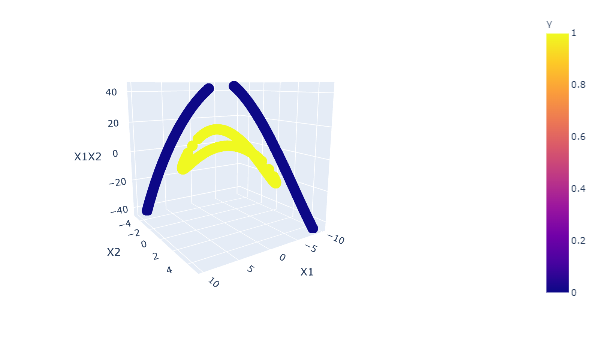

In [41]:
%matplotlib inline
import plotly.express as px
fig = px.scatter_3d(df, x='X1_square', y='X2_square', z='X1X2', color='Y')   # polynomial transformed parameters allows now separating the data with a plane
fig.show()

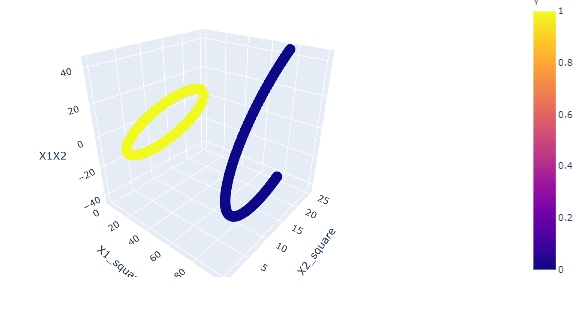

In [42]:
# we are using here a linear kernel because we have transformed manually the input parameters X1,X2 into X1^2,X2^2,X1*X2

classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

# RBF Kernel

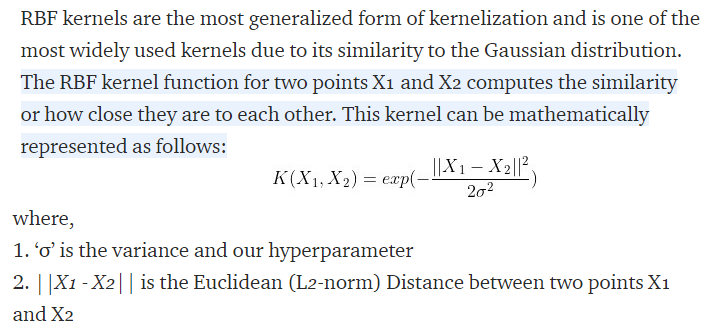

In [48]:
X = df[["X1","X2"]].copy()
y=df.Y.copy()
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(400, 2) (400,)
(300, 2) (300,) (100, 2) (100,)


In [49]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

# SVM II

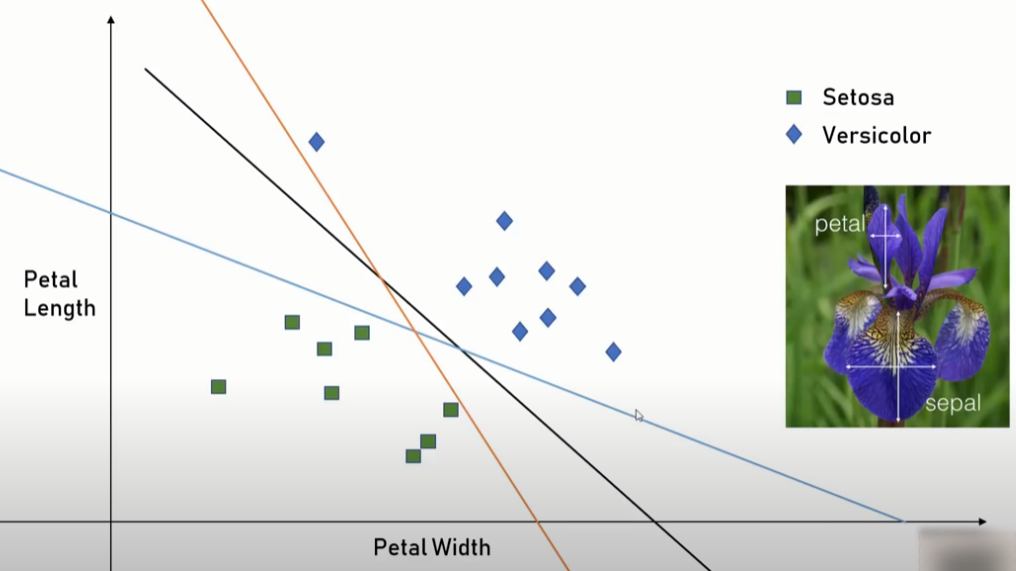


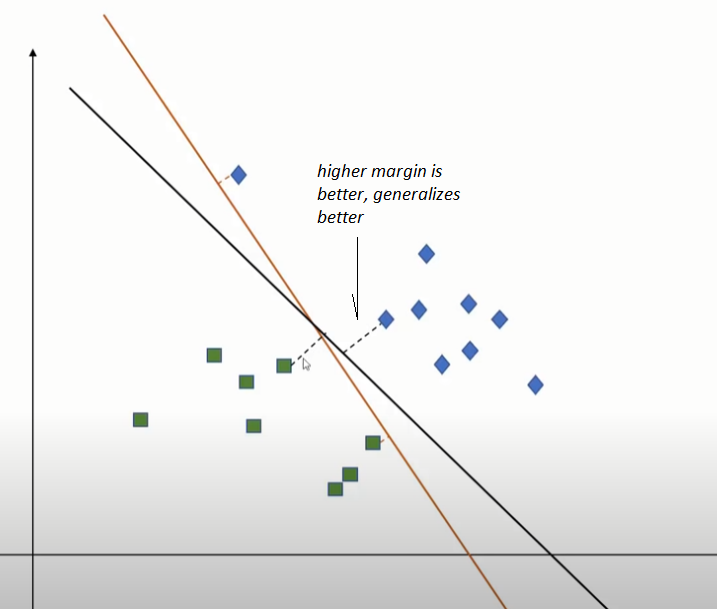

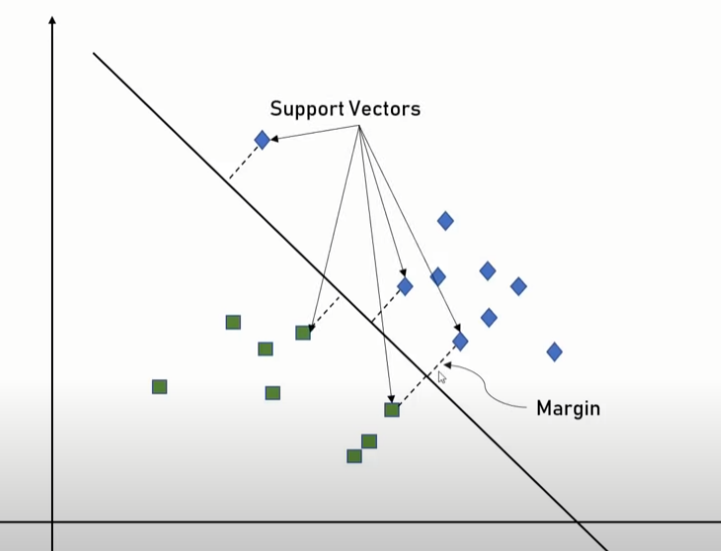

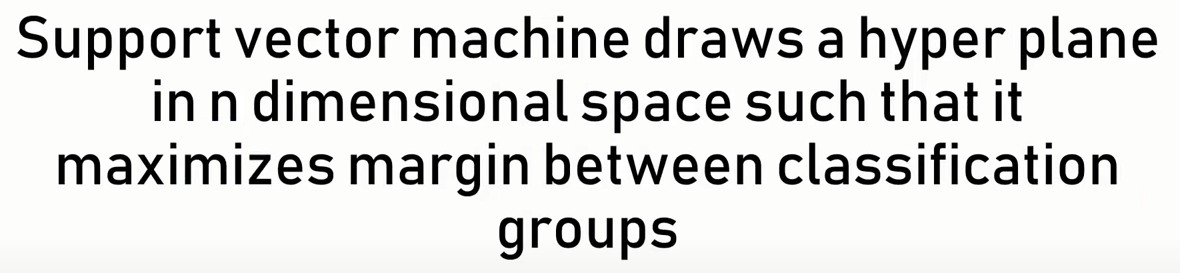

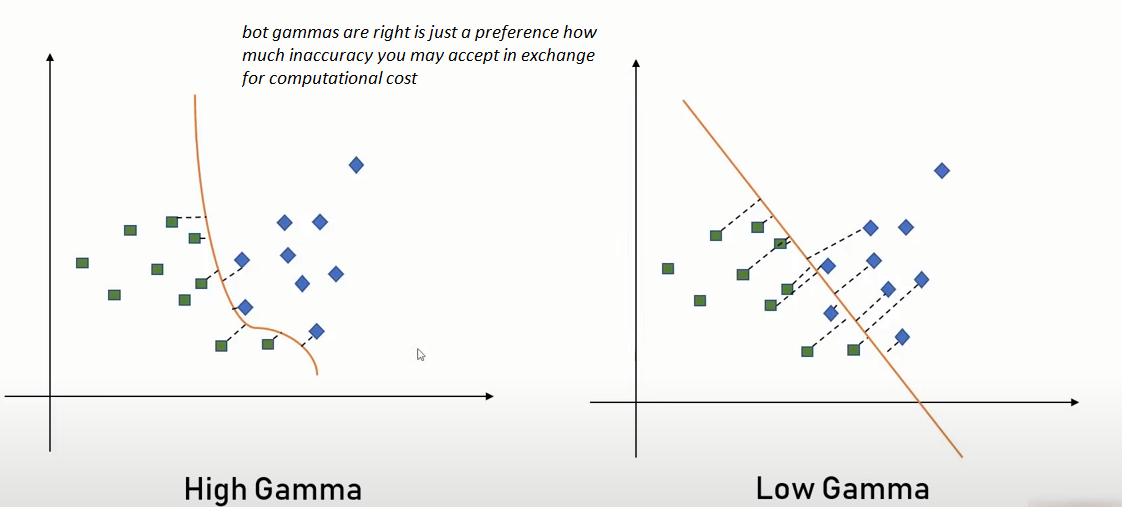

* here we are considering only the nearest support vectors - high gamma, the hyperplane can be more complex
* in contrast you can use the far away suport vectors also - low gamma and therefore your hyperplane can be less complex

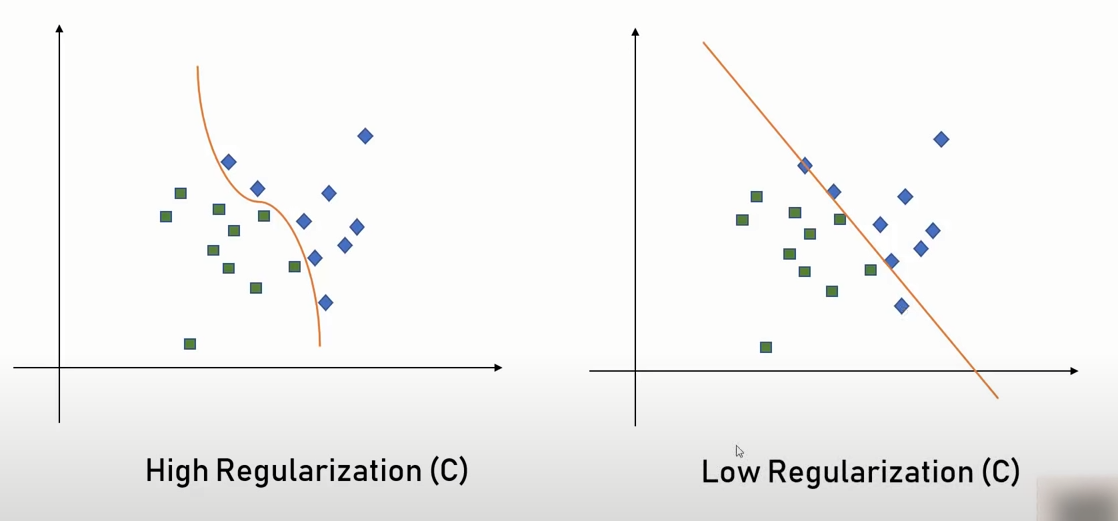
* higher regularization - more correct but can lead to overfitting
* lower regularization - you can acept some errors but less overfitting is involved, generallizes bette


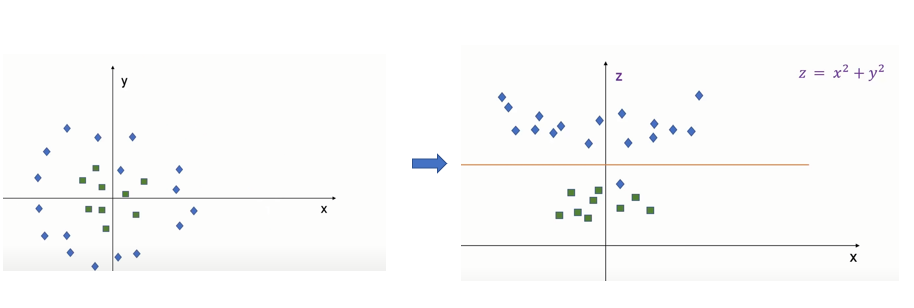
* creates new features through matematical trasnformation so changes the dimensionality to a more complex one

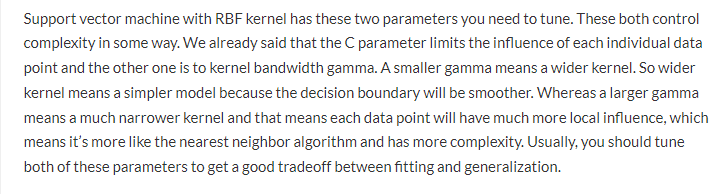

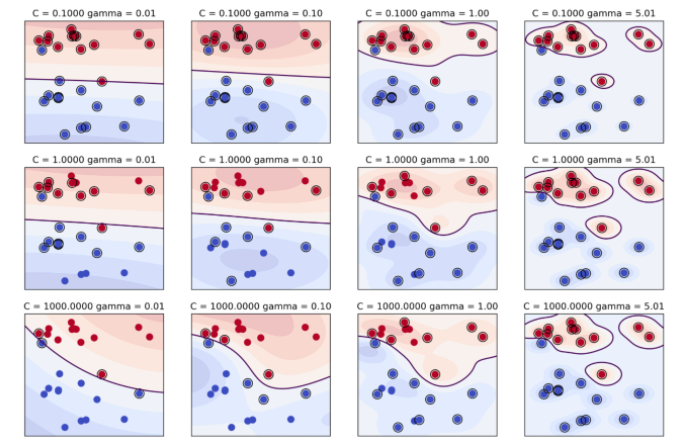

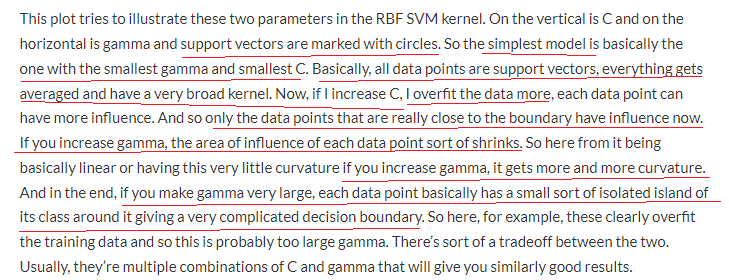

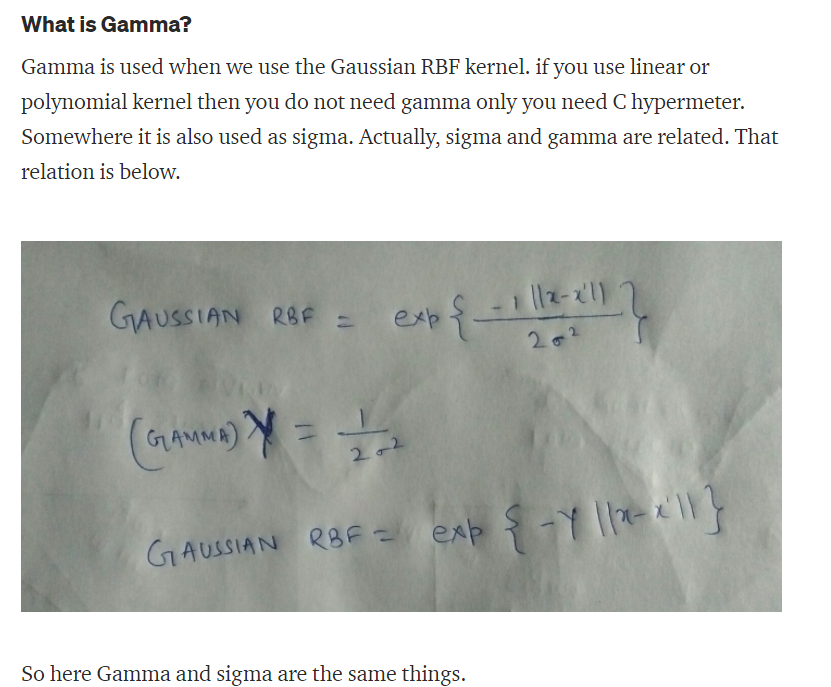

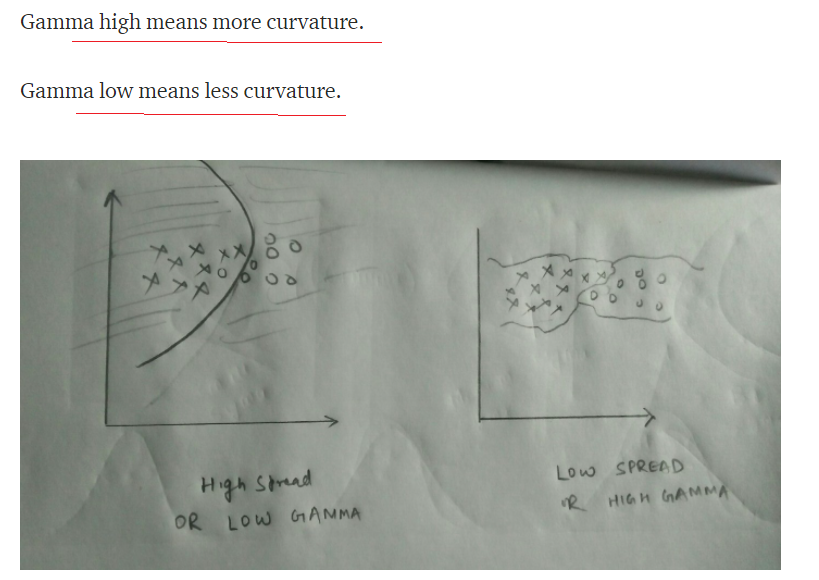

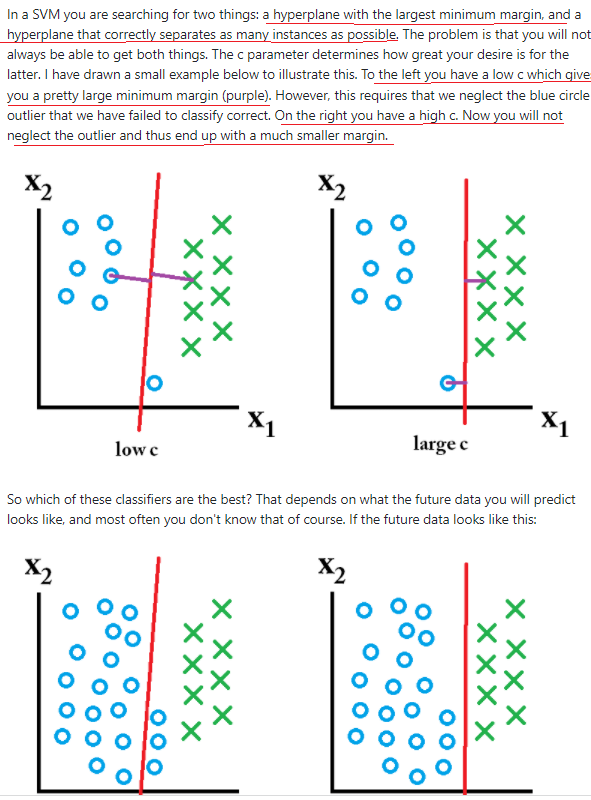

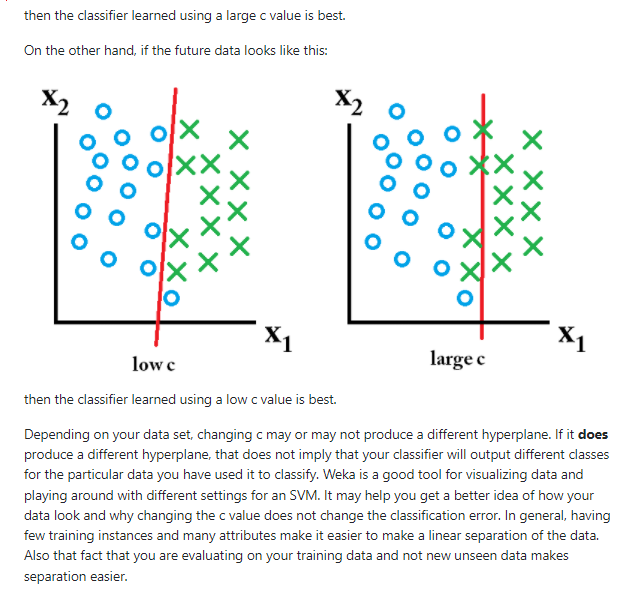

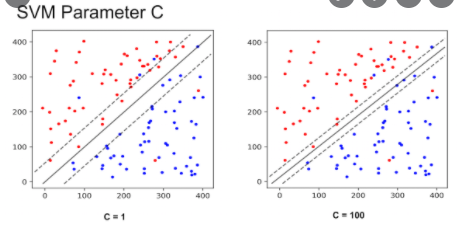

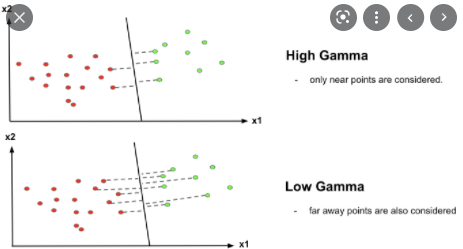

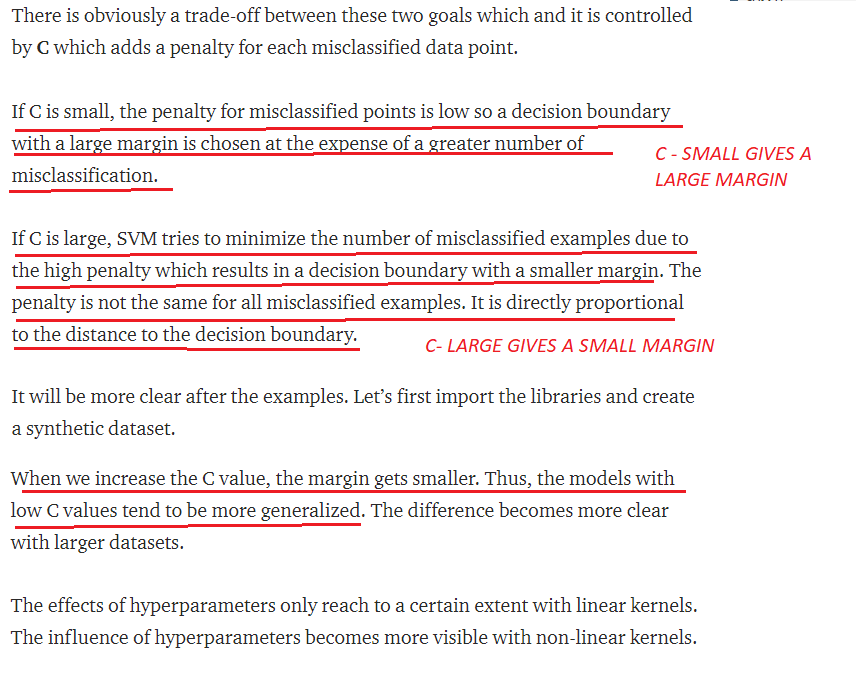

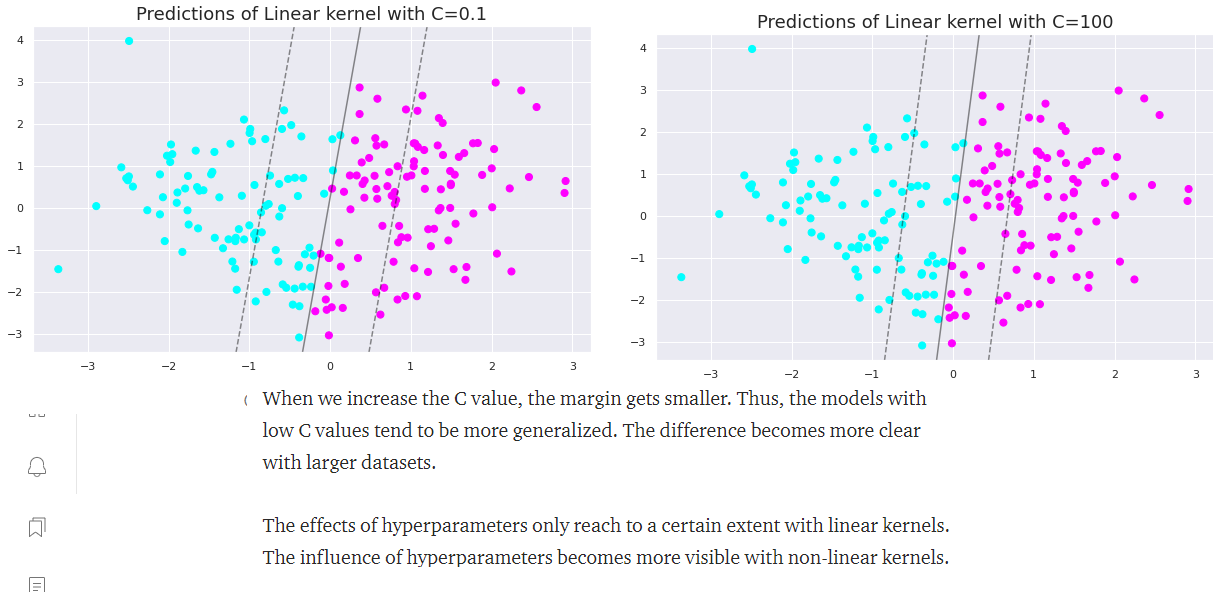

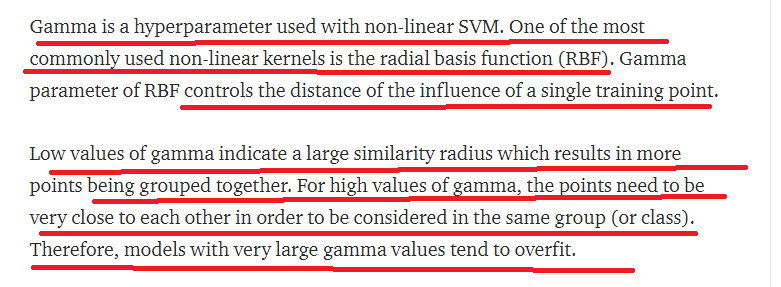

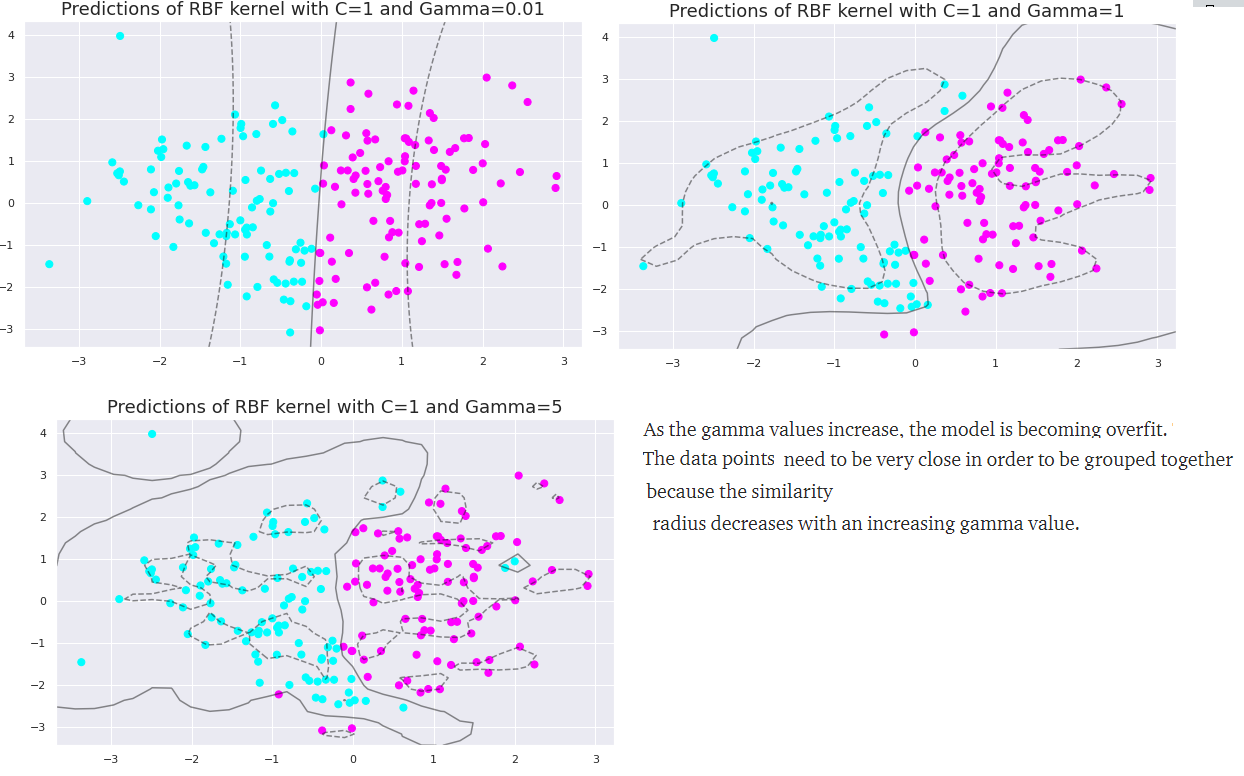

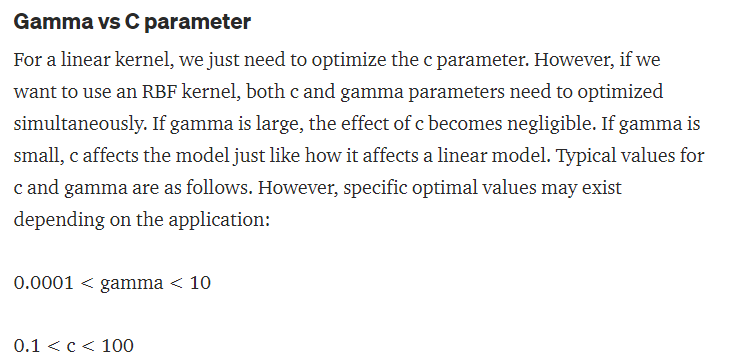

In [51]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [53]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [54]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [55]:
df['target']=iris.target
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [56]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [58]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target flower_name  
0         0      setosa  
1         0      setosa  
2         0      setosa  
3         0      setosa  
4         0      setosa  
..      ...         ...  
145       2   virginica  
146       2   virginica  
147       2   virginica  
148       2   virginica  
149       2   virginica  

[150 rows x 6 columns]

In [59]:
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

Text(0, 0.5, 'sepal width (cm)')

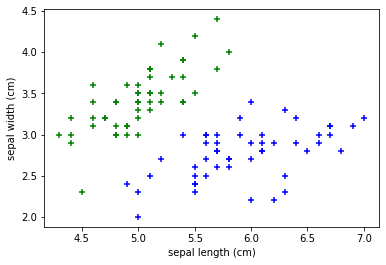

In [62]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker="+")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker="+")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'petal width (cm)')

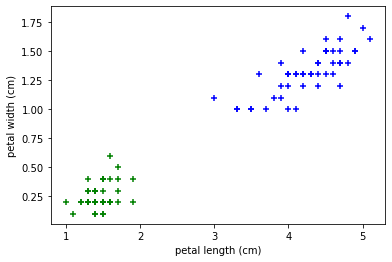

In [63]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker="+")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker="+")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [64]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [74]:
from sklearn.model_selection import train_test_split

X = df.drop(["target", "flower_name"],axis='columns').copy()
print(X)
y=df.target.copy()
print(y)

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.20)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [75]:
from sklearn.svm import SVC

model = SVC()   # default kernal rbf
model.fit(X_train,y_train)

SVC()

In [76]:
model.score(X_test,y_test)  # predict how accurate the model is, use X_test for predictions y_predict and compares it with y_test

0.9666666666666667

In [77]:
model = SVC(C=10, gamma=10)
model.fit(X_train,y_train)
model.score(X_test,y_test)  # predict how accurate the model is, use X_test for predictions y_predict and compares it with y_test

0.9

In [78]:
from sklearn.svm import SVC

model = SVC(kernel="linear")   # 
model.fit(X_train,y_train)
model.score(X_test,y_test)  # predict how accurate the model is, use X_test for predictions y_predict and compares it with y_test

0.9666666666666667

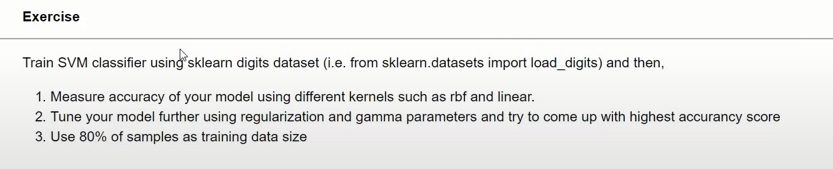

##### 1. What Are the Basic Assumption?
There are no such assumptions

#####  2. Advantages
1. SVM is more effective in high dimensional spaces.
2. SVM is relatively memory efficient.
3. SVM’s are very good when we have no idea on the data.
4. Works well with even unstructured and semi structured data like text, Images and trees.
5. The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
6. SVM models have generalization in practice, the risk of over-fitting is less in SVM.

##### 3. Disadvantages
1. More Training Time is required for larger dataset
2. It is difficult to choose a good kernel function
https://www.youtube.com/watch?v=mTyT-oHoivA
3. The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

##### 4. Whether Feature Scaling is required?
Yes
##### 5. Impact of Missing Values?
Although SVMs are an attractive option when constructing a classifier, SVMs do not easily accommodate missing covariate information. Similar to other prediction and classification methods, in-attention to missing data when constructing an SVM can impact the accuracy and utility of the resulting classifier.
##### 6. Impact of outliers?
It is usually sensitive to outliers
https://arxiv.org/abs/1409.0934#:~:text=Despite%20its%20popularity%2C%20SVM%20has,causes%20the%20sensitivity%20to%20outliers.

##### Types of Problems it can solve(Supervised)
1. Classification
2. Regression

##### Overfitting And Underfitting
In SVM, to avoid overfitting, we choose a Soft Margin, instead of a Hard one i.e. we let some data points enter our margin intentionally (but we still penalize it) so that our classifier don't overfit on our training sample

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#### Practical Implementation
1. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

##### Performance Metrics

##### Classification
1. Confusion Matrix 
2. Precision,Recall, F1 score

##### Regression
1. R2,Adjusted R2
2. MSE,RMSE,MAE

# SWM Classification

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC   # creates a suport vector machine for classification
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA

In [7]:
df = pd.read_excel("D:\\lh_data\\ineuron\\default of credit card clients.xls",header=1)
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
df.rename(columns={"default payment next month": "DEFAULT"}, inplace=True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [12]:
df.drop("ID",axis=1,inplace=True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [13]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [14]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

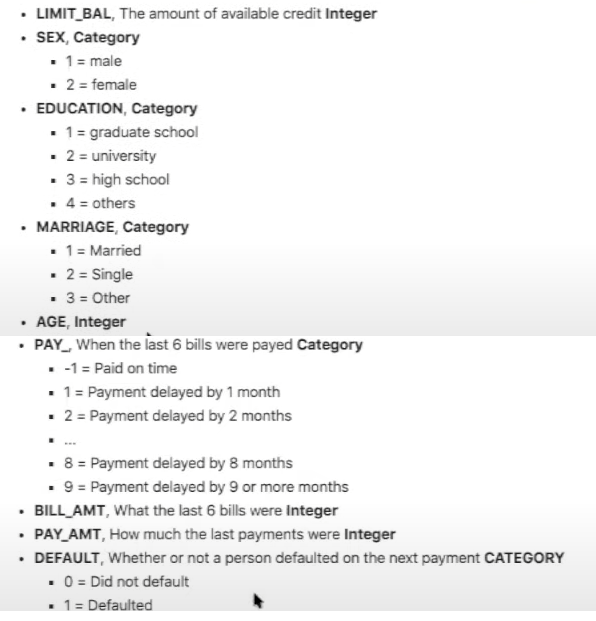

In [16]:
df.SEX.unique()

array([2, 1], dtype=int64)

In [17]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [18]:
df.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

### SVM do not support datsets with missing values

In [31]:
print(f" missing values: {len(df.loc[(df.EDUCATION==0) | (df.MARRIAGE==0)])} out of total rows:{len(df)}")

 missing values: 68 out of total rows:30000


In [40]:
df.loc[(df.EDUCATION!=0) & (df.MARRIAGE!=0)].head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  
3      1100      1069      1000        0  
4      9000       689       679        0  

[5 rows x 24 columns]

In [39]:
df = df.loc[(df.EDUCATION!=0) & (df.MARRIAGE!=0)] # filtering only rows without zero values at education/marriage
len(df)

29932

In [41]:
df.EDUCATION.unique()   # testing that no zero values are in education

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [43]:
df.MARRIAGE.unique()   # testing that no zero values are in marriage

array([1, 2, 3], dtype=int64)

In [45]:
df_default = df[df.DEFAULT==1]
df_default_no =df[df.DEFAULT==0]
print(df_default.shape, df_default_no.shape)

(6631, 24) (23301, 24)


In [ ]:
# resample the data since SVM is great with small datasets, we donwsice both datasets to 1k each.

In [46]:
df_default_rs = resample(df_default, replace=False, n_samples=1000, random_state=42)  # replace means do not repeat samples
df_default_rs.shape

(1000, 24)

In [47]:
df_default_no_rs = resample(df_default_no, replace=False, n_samples=1000, random_state=42)   # replace means do not repeat samples
df_default_no_rs.shape

(1000, 24)

In [54]:
df_rs = pd.concat([df_default_rs, df_default_no_rs],ignore_index=True)
df_rs.shape

(2000, 24)

In [55]:
df_rs

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0        300000    2          1         1   47      3      2      2      2   
1         80000    2          2         2   36      2      0      0     -2   
2         30000    2          3         2   22      2      2      0      0   
3         80000    1          1         2   34      2      2      2      2   
4        210000    2          3         1   44     -2     -2     -2     -2   
...         ...  ...        ...       ...  ...    ...    ...    ...    ...   
1995     150000    2          1         1   31     -1     -1     -2     -2   
1996     180000    1          6         1   34     -2     -2     -2     -2   
1997      90000    2          1         2   33     -1     -1     -1     -1   
1998     120000    2          3         1   38      0      0      0      0   
1999      20000    1          1         2   27      1     -2     -2     -2   

      PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         2  ...       5000       5000       5000         0         0   
1        -2  ...          0          0          0      1700         0   
2         0  ...      29507      11609      11711         0      1687   
3         2  ...      64682      65614      67007      2800      3000   
4        -2  ...          0       5646      14793     13462     17706   
...     ...  ...        ...        ...        ...       ...       ...   
1995     -2  ...          0          0          0         0         0   
1996     -2  ...          0          0          0         0         0   
1997     -1  ...       3000       3000       3000      6000         0   
1998      0  ...     119719     118042     120682      5720      5820   
1999     -2  ...          0          0          0         0         0   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0            0         0         0         0        1  
1            0         0         0         0        1  
2         1147       524       400       666        1  
3         2500      2600      2600      2600        1  
4            0      5646     14793      7376        1  
...        ...       ...       ...       ...      ...  
1995         0         0         0         0        0  
1996         0         0         0         0        0  
1997      3000      3000      3000      3000        0  
1998      5670      4250      4450      4470        0  
1999         0         0         0         0        0  

[2000 rows x 24 columns]

In [56]:
X = df_rs.drop("DEFAULT",axis=1).copy()
X

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0        300000    2          1         1   47      3      2      2      2   
1         80000    2          2         2   36      2      0      0     -2   
2         30000    2          3         2   22      2      2      0      0   
3         80000    1          1         2   34      2      2      2      2   
4        210000    2          3         1   44     -2     -2     -2     -2   
...         ...  ...        ...       ...  ...    ...    ...    ...    ...   
1995     150000    2          1         1   31     -1     -1     -2     -2   
1996     180000    1          6         1   34     -2     -2     -2     -2   
1997      90000    2          1         2   33     -1     -1     -1     -1   
1998     120000    2          3         1   38      0      0      0      0   
1999      20000    1          1         2   27      1     -2     -2     -2   

      PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0         2  ...       5000       5000       5000       5000         0   
1        -2  ...          0          0          0          0      1700   
2         0  ...      29047      29507      11609      11711         0   
3         2  ...      63827      64682      65614      67007      2800   
4        -2  ...      17706          0       5646      14793     13462   
...     ...  ...        ...        ...        ...        ...       ...   
1995     -2  ...          0          0          0          0         0   
1996     -2  ...          0          0          0          0         0   
1997     -1  ...          0       3000       3000       3000      6000   
1998      0  ...     120127     119719     118042     120682      5720   
1999     -2  ...          0          0          0          0         0   

      PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0            0         0         0         0         0  
1            0         0         0         0         0  
2         1687      1147       524       400       666  
3         3000      2500      2600      2600      2600  
4        17706         0      5646     14793      7376  
...        ...       ...       ...       ...       ...  
1995         0         0         0         0         0  
1996         0         0         0         0         0  
1997         0      3000      3000      3000      3000  
1998      5820      5670      4250      4450      4470  
1999         0         0         0         0         0  

[2000 rows x 23 columns]

In [57]:
y = df_rs.DEFAULT.copy()
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: DEFAULT, Length: 2000, dtype: int64

# one hot encoding

In [58]:
X.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dtype: object

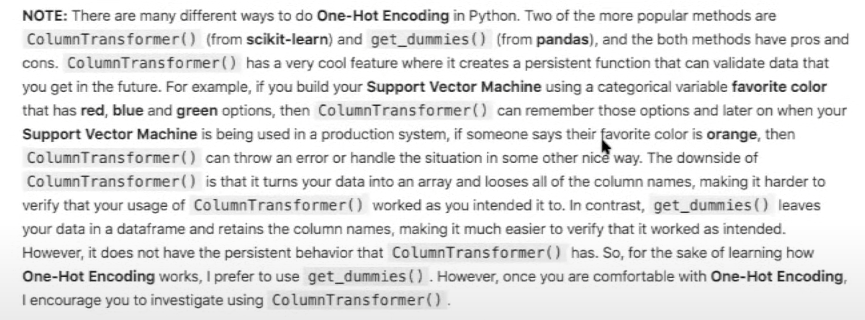

In [60]:
set(X.MARRIAGE)

{1, 2, 3}

In [70]:
pd.get_dummies(X,columns=["MARRIAGE"]).head(10).iloc[:,-3:]

MARRIAGE_1  MARRIAGE_2  MARRIAGE_3
0           1           0           0
1           0           1           0
2           0           1           0
3           0           1           0
4           1           0           0
5           0           1           0
6           0           1           0
7           0           1           0
8           0           1           0
9           0           1           0

In [73]:
X_encoded = pd.get_dummies(X,columns=["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"])
X_encoded

LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0        300000   47       5000       5000       5000       5000       5000   
1         80000   36      19671      20650          0          0          0   
2         30000   22      29793      29008      29047      29507      11609   
3         80000   34      61231      62423      63827      64682      65614   
4        210000   44      11771      13462      17706          0       5646   
...         ...  ...        ...        ...        ...        ...        ...   
1995     150000   31      12420          0          0          0          0   
1996     180000   34          0          0          0          0          0   
1997      90000   33       3000       6000          0       3000       3000   
1998     120000   38     118016     117738     120127     119719     118042   
1999      20000   27          0          0          0          0          0   

      BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_5_7  PAY_6_-2  PAY_6_-1  \
0          5000         0         0  ...        0         0         0   
1             0      1700         0  ...        0         1         0   
2         11711         0      1687  ...        0         0         0   
3         67007      2800      3000  ...        0         0         0   
4         14793     13462     17706  ...        0         1         0   
...         ...       ...       ...  ...      ...       ...       ...   
1995          0         0         0  ...        0         1         0   
1996          0         0         0  ...        0         1         0   
1997       3000      6000         0  ...        0         0         1   
1998     120682      5720      5820  ...        0         0         0   
1999          0         0         0  ...        0         1         0   

      PAY_6_0  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  
0           0        1        0        0        0        0        0  
1           0        0        0        0        0        0        0  
2           1        0        0        0        0        0        0  
3           0        1        0        0        0        0        0  
4           0        0        0        0        0        0        0  
...       ...      ...      ...      ...      ...      ...      ...  
1995        0        0        0        0        0        0        0  
1996        0        0        0        0        0        0        0  
1997        0        0        0        0        0        0        0  
1998        1        0        0        0        0        0        0  
1999        0        0        0        0        0        0        0  

[2000 rows x 81 columns]

In [74]:
X_encoded.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_4_-2',
       'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_7', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_6_-2', 'PAY_6_-1',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3'

# scaling

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, random_state=4)
print(X_encoded.shape, y.shape)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2000, 81) (2000,)
(1500, 81) (500, 81) (1500,) (500,)


<AxesSubplot:>

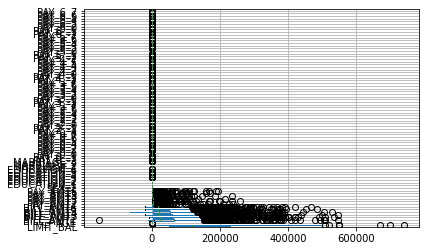

In [76]:
x_train.boxplot(vert=False)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

<AxesSubplot:>

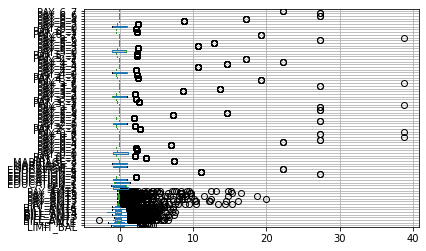

In [83]:
x_train_sc_df = pd.DataFrame(x_train_sc, columns=x_train.columns)
x_train_sc_df.boxplot(vert=False)

In [84]:
x_train_sc_df.head()

LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -0.995385  0.321836  -0.656233  -0.661267  -0.655118  -0.665004  -0.629159   
1   0.335553 -1.026351  -0.127513  -0.444551  -0.250610  -0.492781  -0.219920   
2  -0.525642 -0.818937   0.073090   0.070816   0.257817   0.324148   0.417295   
3  -0.290771 -1.337471  -0.582207  -0.649552  -0.677575  -0.669518  -0.655556   
4  -0.447352 -0.818937   0.095543   0.089579   0.138515   0.162709  -0.240486   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...   PAY_5_7  PAY_6_-2  PAY_6_-1   PAY_6_0  \
0  -0.652214 -0.197229 -0.159833  ... -0.051709  2.337845 -0.455773 -1.024295   
1  -0.593061  0.842875  1.613675  ... -0.051709 -0.427744 -0.455773  0.976281   
2   0.484586 -0.343483  0.332072  ... -0.051709 -0.427744 -0.455773  0.976281   
3  -0.511738 -0.277898 -0.225615  ... -0.051709 -0.427744  2.194072 -1.024295   
4  -0.222953 -0.009002 -0.122633  ... -0.051709 -0.427744 -0.455773  0.976281   

   PAY_6_2   PAY_6_3   PAY_6_4   PAY_6_5   PAY_6_6   PAY_6_7  
0 -0.40459 -0.113266 -0.057831 -0.036539 -0.036539 -0.044766  
1 -0.40459 -0.113266 -0.057831 -0.036539 -0.036539 -0.044766  
2 -0.40459 -0.113266 -0.057831 -0.036539 -0.036539 -0.044766  
3 -0.40459 -0.113266 -0.057831 -0.036539 -0.036539 -0.044766  
4 -0.40459 -0.113266 -0.057831 -0.036539 -0.036539 -0.044766  

[5 rows x 81 columns]

<AxesSubplot:>

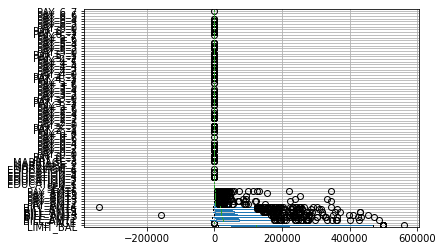

In [159]:
x_test.boxplot(vert=False)

<AxesSubplot:>

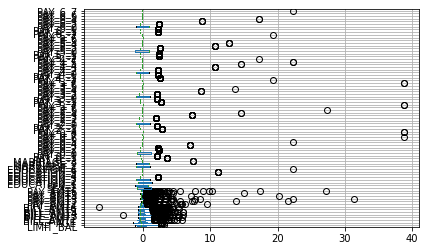

In [160]:
x_test_sc_df = pd.DataFrame(x_test_sc, columns=x_test.columns)
x_test_sc_df.boxplot(vert=False)

# SVM

In [85]:
clf_svm = SVC(random_state=42)
clf_svm.fit(x_train_sc,y_train)

SVC(random_state=42)

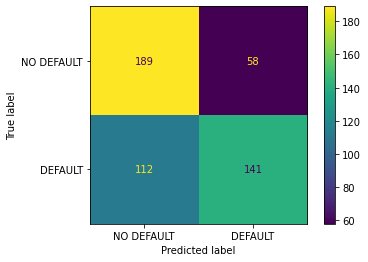

In [89]:
plot_confusion_matrix(clf_svm, x_test_sc, y_test, values_format="d",display_labels=["NO DEFAULT","DEFAULT"])

# cross validation

In [102]:
param_grid = {"C":[0.1,0.5,1,5,10,100],
              "gamma":["scale",1,0.1,0.01,0.001,0.0001],
              "kernel":["rbf"]}
param_grid

{'C': [0.1, 0.5, 1, 5, 10, 100],
 'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['rbf']}

In [103]:
svc_gs=GridSearchCV(SVC(),param_grid,cv=5,scoring="accuracy", verbose=0)

In [104]:
svc_gs.fit(x_train_sc,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [105]:
print(f" optimal parameters: {svc_gs.best_params_}")

 optimal parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [106]:
# use the best parameters
clf_svm = SVC(C= 1, gamma= 0.01, kernel= 'rbf', random_state=42)
clf_svm.fit(x_train_sc,y_train)

SVC(C=1, gamma=0.01, random_state=42)

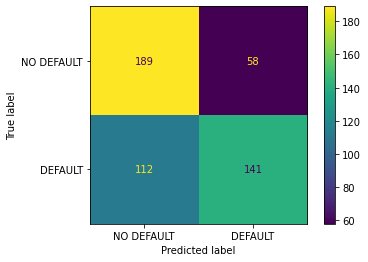

In [107]:
plot_confusion_matrix(clf_svm, x_test_sc, y_test, values_format="d",display_labels=["NO DEFAULT","DEFAULT"])

# PCA to reduce from 24 columns/features to 2 orthogonal for display purposes

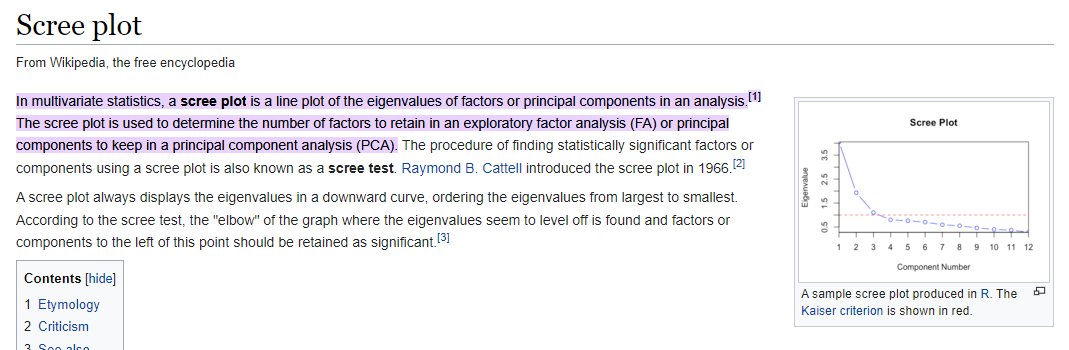

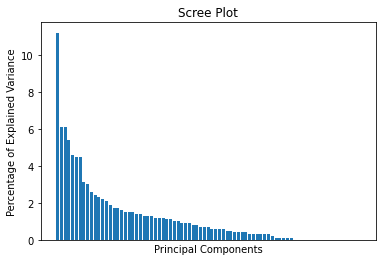

In [161]:
pca = PCA()  # pca requires data to be scaled
x_train_pca = pca.fit_transform(x_train_sc)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(axis="x",           # apply on x-axis
                which="both",       # major and minor ticks are affected
                bottom=False,       # ticks along the bottom edge are off
                top=False,          # tick along the top edge are off
                labelbottom=False)   # labels along the bottom edge are off
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()
        

In [162]:
per_var

array([11.2,  6.1,  6.1,  5.4,  4.6,  4.5,  4.5,  3.1,  3. ,  2.6,  2.4,
        2.3,  2.2,  2.1,  1.9,  1.7,  1.7,  1.6,  1.5,  1.5,  1.5,  1.4,
        1.4,  1.3,  1.3,  1.3,  1.2,  1.2,  1.2,  1.1,  1.1,  1. ,  1. ,
        0.9,  0.9,  0.9,  0.8,  0.8,  0.7,  0.7,  0.7,  0.6,  0.6,  0.6,
        0.6,  0.5,  0.5,  0.4,  0.4,  0.4,  0.4,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ])

In [163]:
train_pc1_coords = x_train_pca
train_pc1_coords

array([[-4.59968452e+00,  4.75443837e+00, -2.54939565e+00, ...,
         2.71661378e-15,  1.02803802e-15, -1.86547382e-16],
       [-1.85091357e+00, -4.38804831e+00, -7.41055588e-01, ...,
         1.81966021e-16,  4.93950516e-16,  5.56895836e-17],
       [ 1.23501070e-01,  1.18423115e+00,  3.52872775e+00, ...,
        -6.40405879e-16, -7.34676249e-17, -1.28788760e-16],
       ...,
       [ 4.18320350e+00,  2.57350288e-01, -1.44763102e+00, ...,
        -7.04358138e-17, -1.83840567e-17,  1.67690680e-17],
       [-4.33214709e+00, -1.39752365e+00, -9.41702249e-01, ...,
         6.88723960e-17, -1.40647435e-17, -5.86544686e-17],
       [ 1.54359881e+00, -7.62726328e-01, -1.04107767e+00, ...,
         1.04846423e-17,  4.32919670e-17, -2.19831882e-17]])

In [164]:
train_pc1_coords = x_train_pca[:,0]
train_pc1_coords            # contains the x-axis coordinates after pca

array([-4.59968452, -1.85091357,  0.12350107, ...,  4.1832035 ,
       -4.33214709,  1.54359881])

In [165]:
train_pc2_coords = x_train_pca[:,1]
train_pc2_coords            # contains the y-axis coordinates after pca  

array([ 4.75443837, -4.38804831,  1.18423115, ...,  0.25735029,
       -1.39752365, -0.76272633])

In [166]:
pc_train = np.column_stack((train_pc1_coords,train_pc2_coords))
pc_train

array([[-4.59968452,  4.75443837],
       [-1.85091357, -4.38804831],
       [ 0.12350107,  1.18423115],
       ...,
       [ 4.1832035 ,  0.25735029],
       [-4.33214709, -1.39752365],
       [ 1.54359881, -0.76272633]])

In [148]:
#pc_train_sc = scale(np.column_stack((train_pc1_coords,train_pc2_coords)))
#pc_train_sc          # Standardize a dataset along any axis.
                     # Center to the mean and component wise scale to unit variance.

In [167]:

print(f" x_max:{train_pc1_coords.max()}, x_min:{train_pc1_coords.min()}")
print(f" y_max:{train_pc2_coords.max()}, y_min:{train_pc2_coords.min()}")

 x_max:12.063107865278656, x_min:-4.953315828024955
 y_max:6.782283817278886, y_min:-4.673637554237476


In [168]:
param_grid = {"C":[0.1,0.5,1,5,10,100],
              "gamma":["scale",1,0.1,0.01,0.001,0.0001],
              "kernel":["rbf"]}
param_grid

{'C': [0.1, 0.5, 1, 5, 10, 100],
 'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['rbf']}

In [169]:
svc_gs_pca=GridSearchCV(SVC(),param_grid,cv=5,scoring="accuracy", verbose=0)

In [170]:
svc_gs_pca.fit(pc_train_sc,y_train)   # optiize the SVM fit to x,y coord after PCA dimension reduction
print(f" optimal parameters after PCA: {svc_gs_pca.best_params_}")

 optimal parameters after PCA: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [171]:
cls_svm_pca = SVC(random_state=42, C=100, gamma='scale', kernel= 'rbf')
cls_svm_pca.fit(pc_train_sc,y_train)

SVC(C=100, random_state=42)

In [172]:
x_test_pca = pca.transform(x_test_sc)   # pca transformation on the test dataset

test_pc1_coords = x_test_pca[:,0]
test_pc2_coords = x_test_pca[:,1]

In [173]:
print(f" x_max:{test_pc1_coords.max()}, x_min:{test_pc1_coords.min()}")
print(f" y_max:{test_pc2_coords.max()}, y_min:{test_pc2_coords.min()}")

 x_max:10.40586984166182, x_min:-4.9423621763095875
 y_max:7.1172995748239885, y_min:-6.071193382035337


In [174]:
x_test_sc.shape

(500, 81)

In [175]:
# create a matrix of points that we can use to show the decision regions.
# the matrix will be a little bit larger than the transformed PCA points
# so that we canplot all of the PCA points on it without them being on the edge.

x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1

y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

In [176]:
print(x_min,x_max,y_min,y_max)

-5.9423621763095875 11.40586984166182 -7.071193382035337 8.117299574823988


In [177]:
# we classify every point in that matrix with the SVM
# point on one side of the classification boundary will get 0, and points on the other side will bet 1.
Z=cls_svm_pca.predict(np.column_stack((xx.ravel(), yy.ravel())))

# Z is just a long array of lots of 0 and 1 representing how each point in the mesh was classified
# use reshape so that each classification (0 or 1) corresponds to a specific point in the matrix
Z=Z.reshape(xx.shape)

Z.shape

(152, 174)

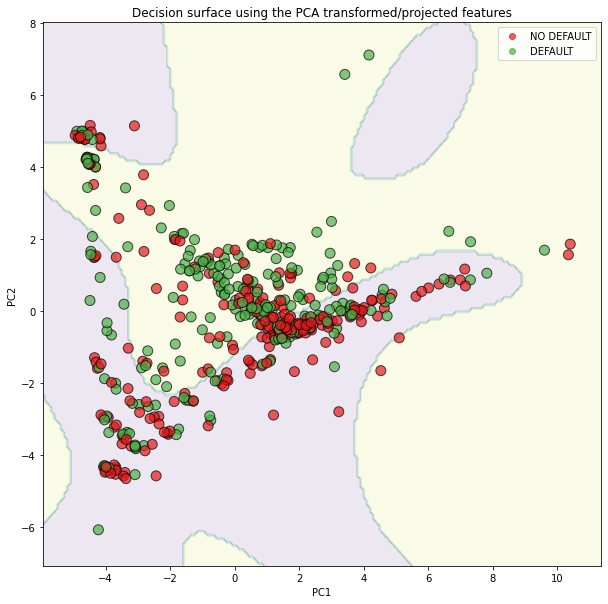

In [178]:
fig, ax = plt.subplots(figsize=(10,10))
# use contourf() to draw a filled countour plot using the matrix values and classifications
# the contours will be filled according to the predicted classification (0 and 1) in Z
ax.contourf(xx,yy,Z,alpha=0.1)

# create custom colors
cmap = colors.ListedColormap(["#e41a1c","#4daf4a"])

# draw the actual points - these will be colored by their known (no predicted) classifications
# setting alpha = 0.7 lets us see if we are covering up a point
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, 
                     cmap=cmap, s=100, edgecolors = "k", alpha=0.7)  # k - black color

# legend
legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc="upper right")
legend.get_texts()[0].set_text("NO DEFAULT")
legend.get_texts()[1].set_text("DEFAULT")

# add axis labels and titles
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
ax.set_title("Decision surface using the PCA transformed/projected features")
plt.show()

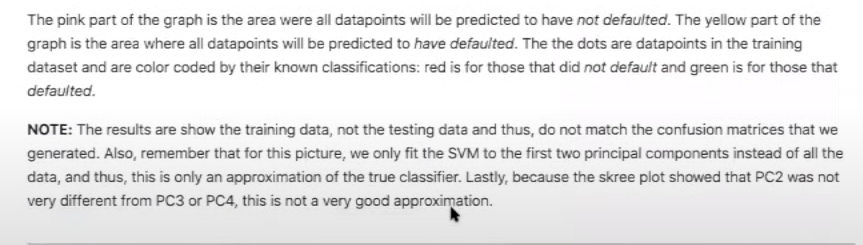